In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

In [2]:
#reading the data 
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# performimng EDE

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#making a copy of the data
data1=data.copy(deep=True)
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#replacing zero with NAN
data2=data1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome']].replace(0,np.NAN)
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,1.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,1.0


In [8]:
data2.shape

(768, 7)

In [9]:
#showing the null values
data2.isnull().sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64

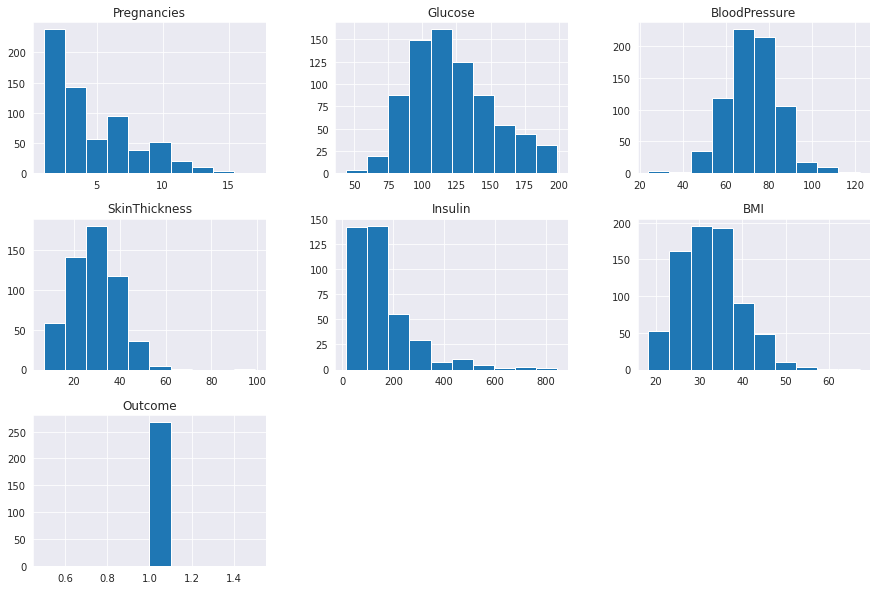

In [10]:
sns.set_style('darkgrid')
data2.hist(figsize=(15,10))

plt.show()

# Imputing the missing values

In [11]:
data2['Pregnancies'].fillna(data['Pregnancies'].median(),inplace=True)
data2['Glucose'].fillna(data['Glucose'].mean(),inplace=True)
data2['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data2['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data2['Insulin'].fillna(data['Insulin'].mean(),inplace=True)
data2['BMI'].fillna(data['BMI'].mean(),inplace=True)

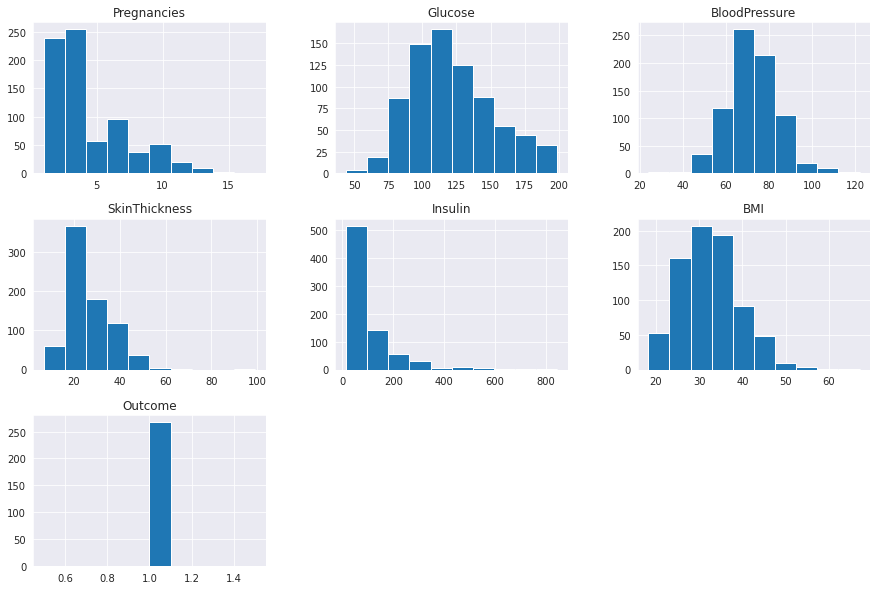

In [12]:
sns.set_style('dark')
data2.hist(figsize=(15,10))

plt.show()

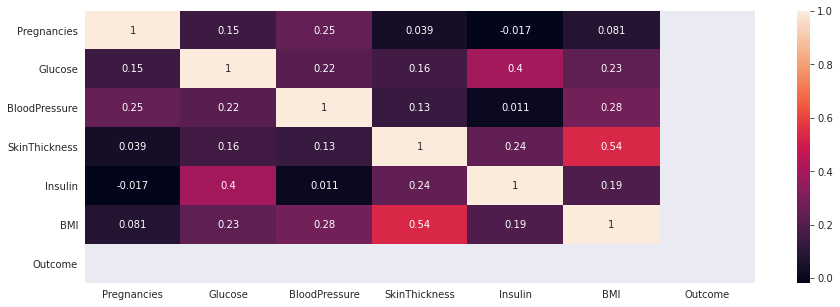

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(data2.corr(),annot=True)

In [14]:
# data2=data2.drop('Outcome',axis=1)
data2.drop('Outcome',axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler
sdt=StandardScaler()
x= pd.DataFrame(sdt.fit_transform(data2),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI'])
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0.570070,0.865276,-0.021044,0.872057,-0.417768,0.167255
1,-1.085807,-1.205989,-0.516583,0.248678,-0.417768,-0.851535
2,1.232421,2.015979,-0.681762,-0.630654,-0.417768,-1.331821
3,-1.085807,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222
4,-0.423456,0.503626,-2.663916,0.872057,0.530423,1.549899
...,...,...,...,...,...,...
763,1.894772,-0.679954,0.309315,2.222711,0.659428,0.065376
764,-0.754631,0.010468,-0.186224,0.040885,-0.417768,0.632988
765,0.238895,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751
766,-1.085807,0.141977,-1.012121,-0.630654,-0.417768,-0.342140


In [16]:
y=data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42,stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


In [19]:
test_score=[]
train_score=[]

In [20]:
for i in range(1,15):
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
train_score

[0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428,
 0.8074866310160428]

In [21]:
#the train score obatined is used for training
max_train_score=max(train_score)
max_train_pp=[i for i,v in enumerate(train_score) if v==max_train_score]
max_train_score*100

80.74866310160428

In [22]:
max_test_score=max(test_score)
max_test_pp=[i  for i,v in enumerate(test_score) if v== max_test_score]
max_test_score*100

80.0

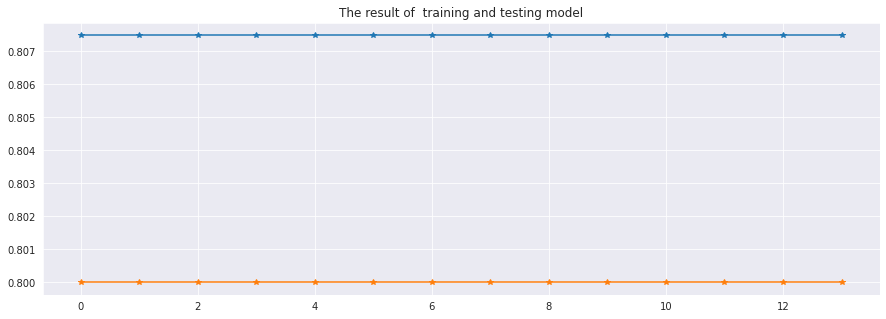

In [23]:
plt.figure(figsize=(15,5))
plt.plot(train_score,marker='*',label="Train score")
plt.plot(test_score,label="Train score",marker='*')
plt.grid()
plt.title('The result of  training and testing model')
plt.show()

In [24]:
# setting the k-neighhour  classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8

In [25]:
from sklearn.metrics import confusion_matrix
y_predict=knn.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[12,  1],
       [ 3,  4]])

In [26]:
p=pd.crosstab(y_test,y_predict,colnames=['Predicted'],rownames=['True'],margins=True)
p

Predicted,0,1,All
True,,,
0,12,1,13
1,3,4,7
All,15,5,20


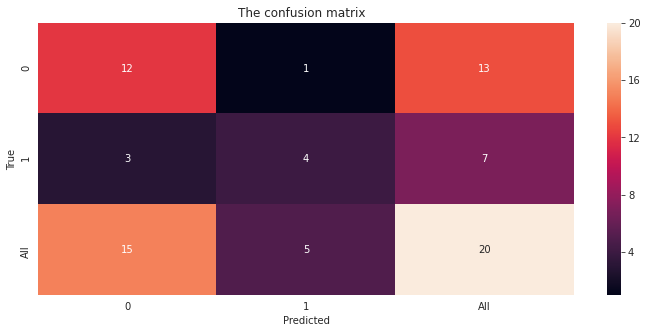

In [27]:
plt.figure(figsize=(12,5))
w =sns.heatmap(p,annot=True)
plt.title("The confusion matrix  ")
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.80      0.57      0.67         7

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [30]:
from sklearn.metrics import roc_curve
y_predicted_proba=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_predicted_proba)

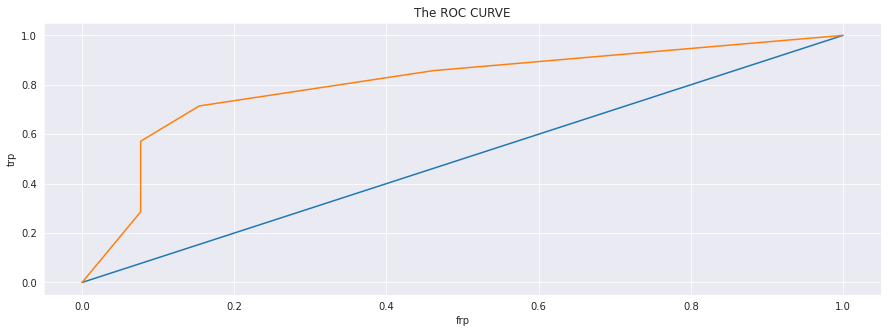

In [31]:
plt.figure(figsize=(15,5))
plt.plot([0,1],[0,1])

plt.plot(fpr,tpr,label='knn')
plt.xlabel('frp')
plt.ylabel('trp')
plt.title('The ROC CURVE')
plt.grid()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
params_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn,params_grid,cv=5)
print(knn_cv.fit(x,y))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [43]:
print('THe best score is ' +str(knn_cv.best_score_))

THe best score is 0.7721354166666666


In [44]:
print('The best params are' +str(knn_cv.best_params_))

The best params are{'n_neighbors': 31}
